In [16]:
from __future__ import division

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

In [2]:
DATA_DIR = os.path.join(os.getcwd(), "data")

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, "HW1-data.csv"))

In [4]:
df.head()

,User,"Gender (1 =F, 0=M)",260: Star Wars: Episode IV - A New Hope (1977),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),1: Toy Story (1995),2028: Saving Private Ryan (1998),...,2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
0,755,0,1.0,5.0,2.0,NaN,4.0,4.0,2.0,2.0,...,2.0,NaN,5.0,2.0,NaN,4.0,2.0,5.0,NaN,NaN
1,5277,0,5.0,3.0,NaN,2.0,4.0,2.0,1.0,NaN,...,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
2,1577,1,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,...,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
3,4388,0,NaN,3.0,NaN,NaN,NaN,1.0,2.0,3.0,...,NaN,4.0,1.0,3.0,5.0,NaN,5.0,1.0,1.0,2.0
4,1202,1,4.0,3.0,4.0,1.0,4.0,1.0,NaN,4.0,...,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN


In [5]:
df.shape

(20, 22)

### Mean

In [6]:
df.mean(axis=0).reset_index()[2:]\
.rename(columns={'index': 'movie', 0: 'avg_rating'})\
.reset_index(drop=True)\
.sort_values(by=['avg_rating'], ascending=False).head(3)

,movie,avg_rating
3,"318: Shawshank Redemption, The (1994)",3.600000
0,260: Star Wars: Episode IV - A New Hope (1977),3.266667
13,541: Blade Runner (1982),3.222222


### Number of ratings

In [7]:
df.isnull().sum().reset_index()[2:].sort_values(by=[0], ascending=True).head(3)

,index,0
8,1: Toy Story (1995),3
6,"593: Silence of the Lambs, The (1991)",4
2,260: Star Wars: Episode IV - A New Hope (1977),5


### % of ratings 4+ (liking)

In [82]:
# Overall
(df.apply(lambda x:x>=4, axis=0).sum() / df.notnull().sum())\
.reset_index()[2:]\
.sort_values(by=[0], ascending=False).head(3)

,index,0
5,"318: Shawshank Redemption, The (1994)",0.700000
2,260: Star Wars: Episode IV - A New Hope (1977),0.533333
7,3578: Gladiator (2000),0.500000


In [84]:
# Calculate Gender wise 

get_most_liked = lambda x: (df[df["Gender (1 =F, 0=M)"] == x].apply(lambda x:x>=4, axis=0).sum() / df.notnull().sum())\
.reset_index()[2:]\
.sort_values(by=[0], ascending=False)\
.head(3)


# Male

get_most_liked(0)

,index,0
17,"2571: Matrix, The (1999)",0.333333
6,"593: Silence of the Lambs, The (1991)",0.312500
5,"318: Shawshank Redemption, The (1994)",0.300000


In [85]:
# Female
get_most_liked(1)

,index,0
21,34: Babe (1995),0.400000
5,"318: Shawshank Redemption, The (1994)",0.400000
15,541: Blade Runner (1982),0.333333


### Association

In [9]:
# Top movies for someone who saw Toy Story
parent_movie = '1: Toy Story (1995)'

# Find users who rated parent movie
x = df[df[parent_movie].notnull() == True].nunique(axis=0).head(1)[0]

# Association with parent movie
(df[df[parent_movie].notnull() == True]\ # Users who rated parent movie
.apply(lambda x:x.count(), axis=0)[2:]\ # Count users who rated parent movie and other movie
.reset_index()\
.rename(columns={'index': 'movie', 0: 'pct'})\
.reset_index(drop=True)\
.set_index(['movie'])\
.drop(parent_movie, axis=0) / x)\ # Remove parent movie column
.apply(lambda x:np.round(x, decimals=3), axis=1)\ # Round off to 3 decimals
.sort_values(['pct', 'movie'], ascending=[False, True])\ # Sort by percentage and movie name
.head(3) # Top 3

,pct
movie,
260: Star Wars: Episode IV - A New Hope (1977),0.824
1210: Star Wars: Episode VI - Return of the Jedi (1983),0.765
"593: Silence of the Lambs, The (1991)",0.765


### Correlation

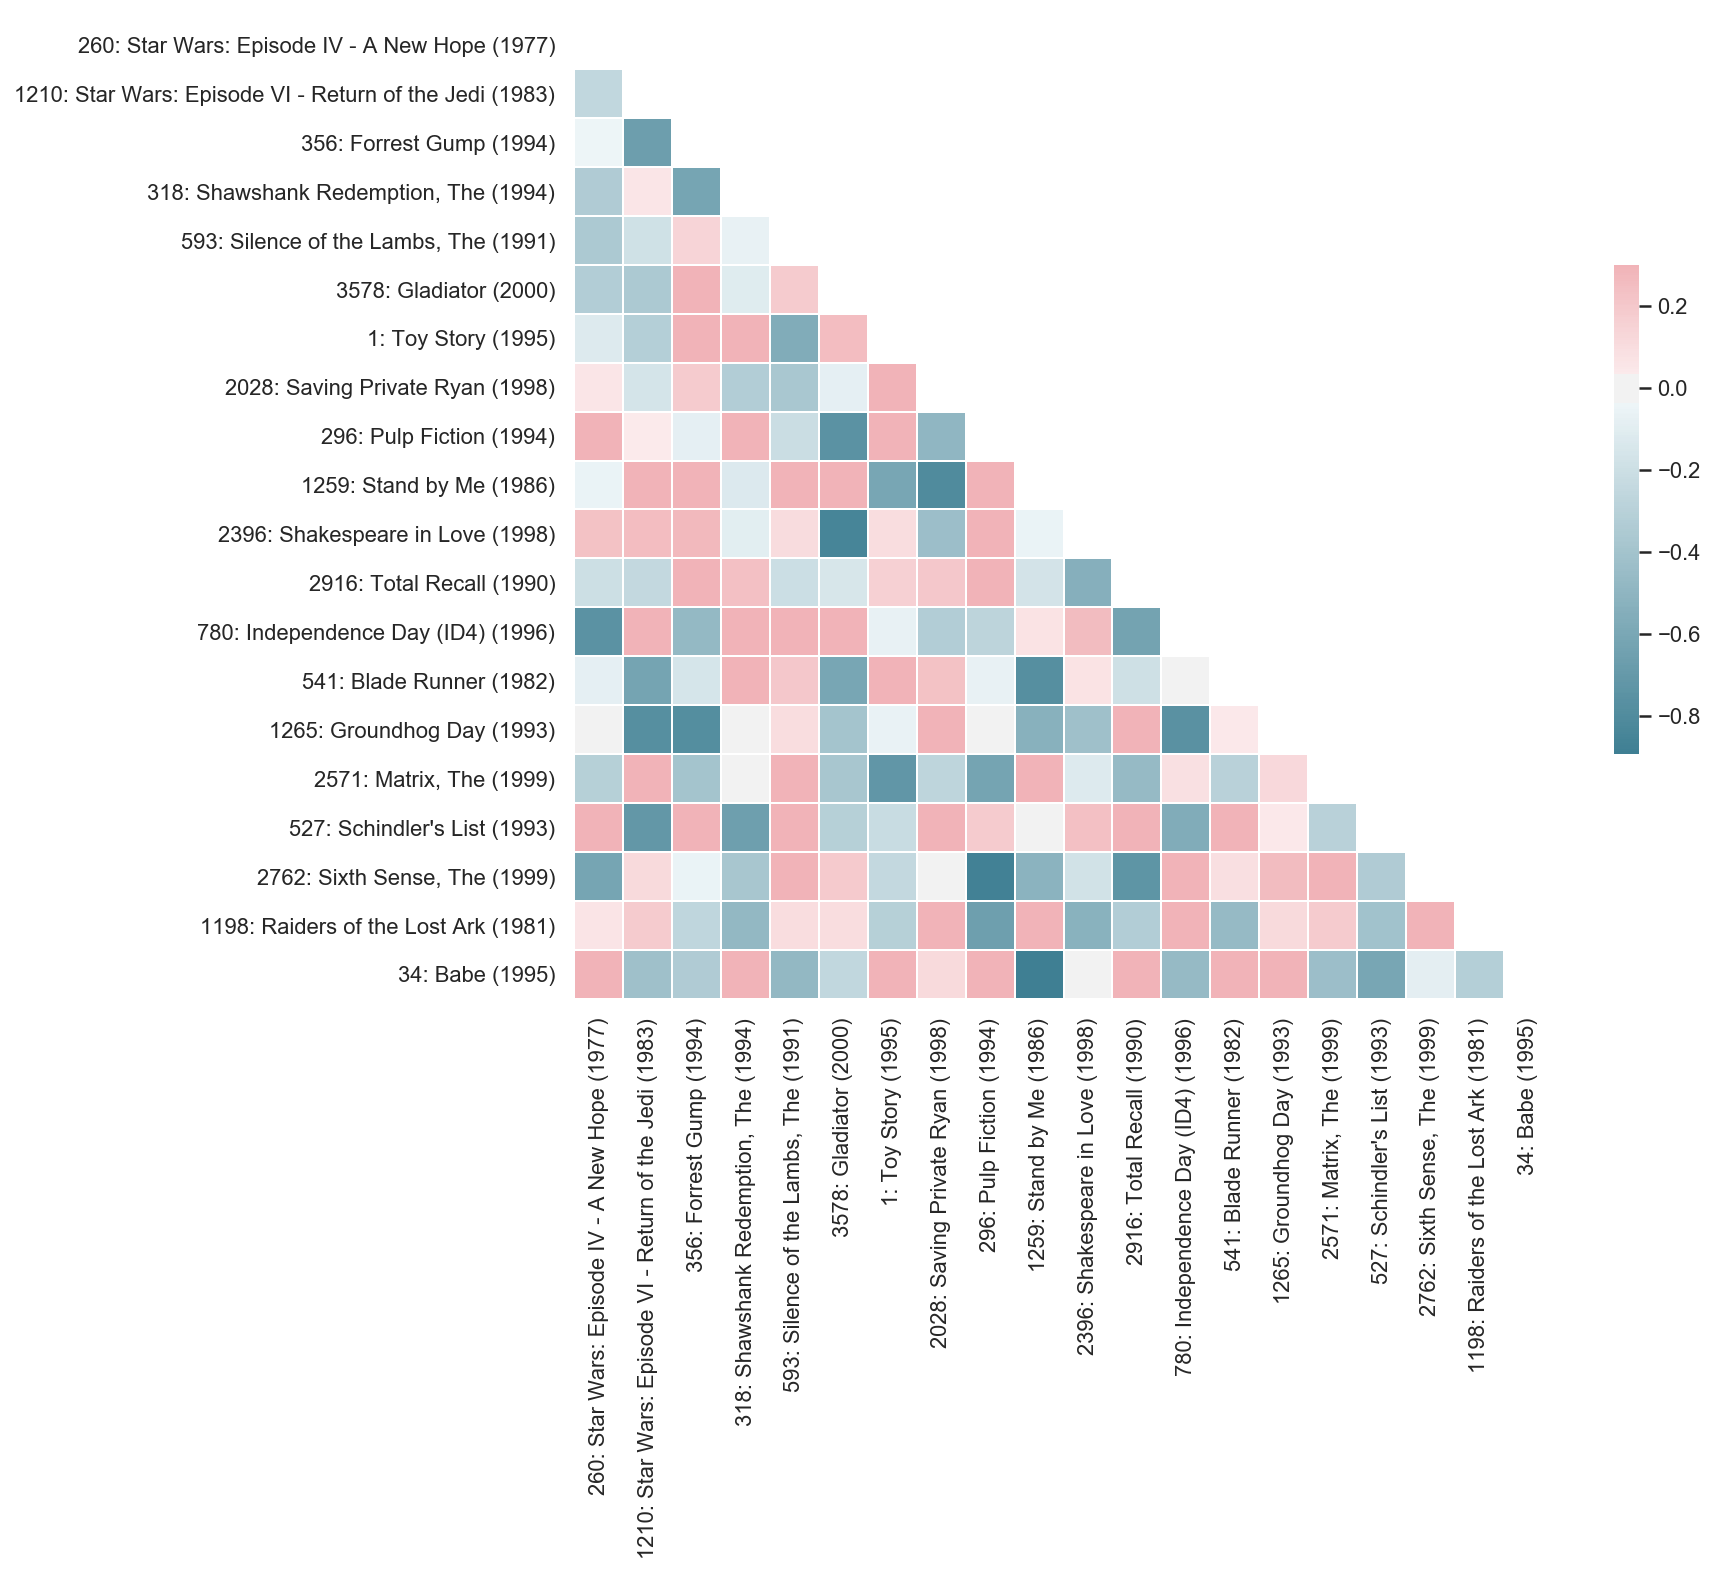

In [29]:
drop_columns = ['User', 'Gender (1 =F, 0=M)']
corr = df.drop(drop_columns, inplace=False, axis=1).corr().apply(lambda x:np.round(x, decimals=3), axis=1)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Mean rating difference by gender    

In [79]:
gender_col = "Gender (1 =F, 0=M)"

get_average = lambda x : df[df[gender_col] == x]\
.mean()[2:]\
.reset_index()\
.rename(columns={'index': 'movie', 0: 'avg'})\
.reset_index(drop=True)

# Female
female_avg = get_average(1)

# Male
male_avg = get_average(0)

# Overall
overall_avg = df.mean()[2:].reset_index().rename(columns={'index': 'movie', 0:'avg'}).reset_index(drop=True)

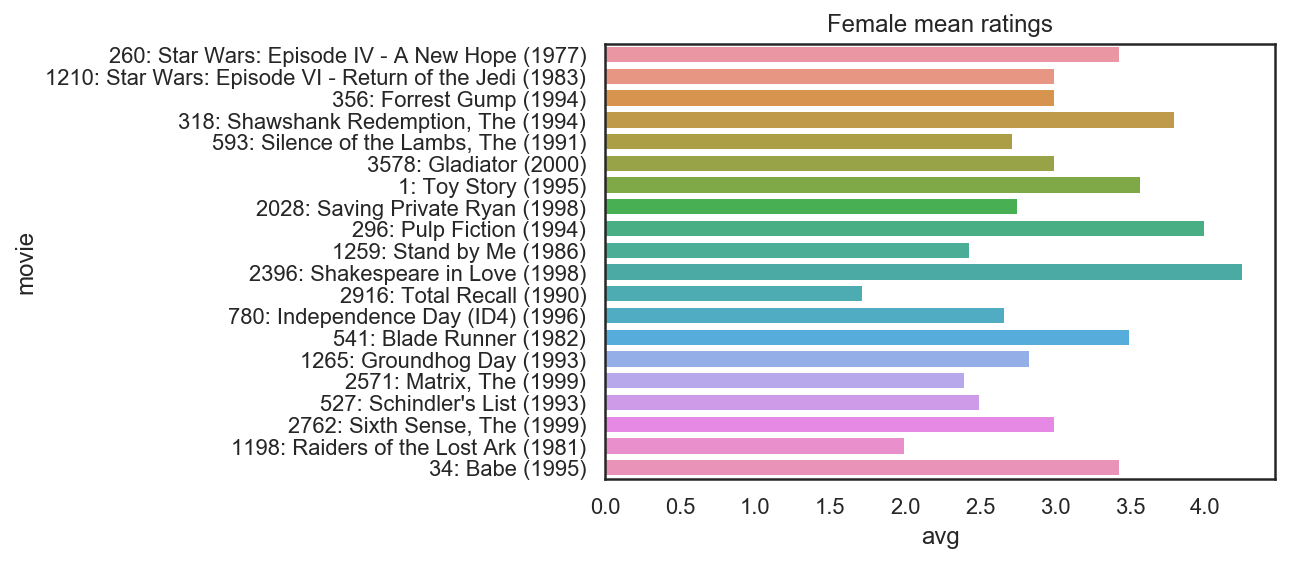

In [80]:
fig = sns.barplot(x='avg', y='movie', data=female_avg)
plt.title('Female mean ratings')
plt.show(fig)

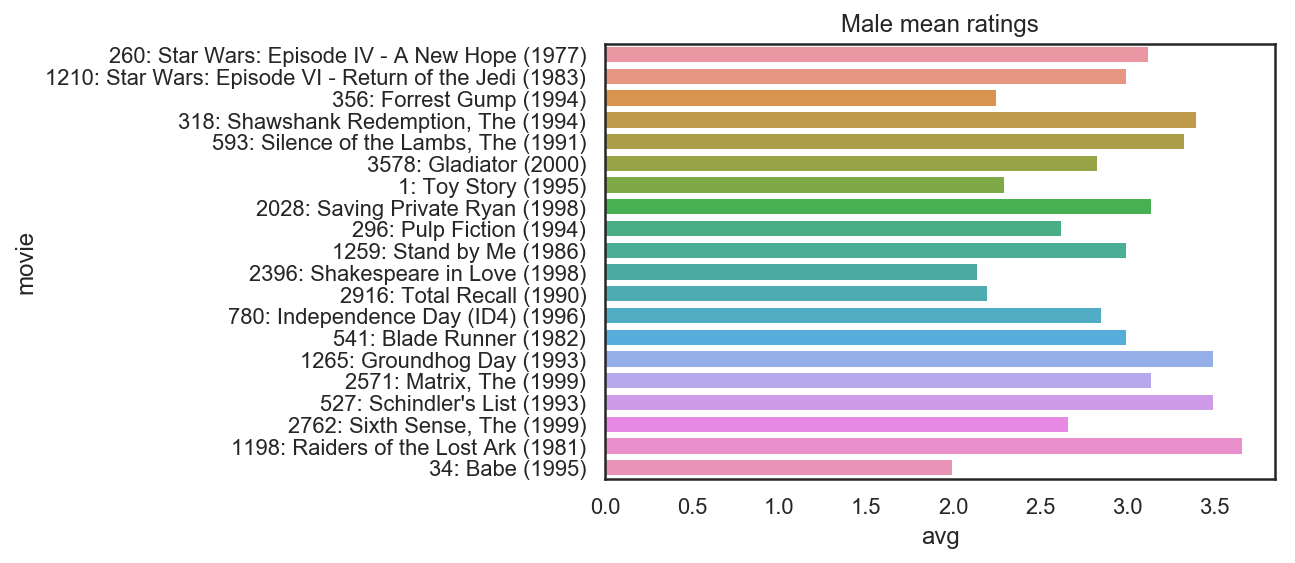

In [81]:
fig = sns.barplot(x='avg', y='movie', data=male_avg)
plt.title('Male mean ratings')
plt.show(fig)

##  Non Personalized Recommender Assignment

- Raw and damped item mean recommender
- Association rule recommender

In [86]:
ASSIGNMENT_DIR = os.path.join(DATA_DIR, "nonrecsys")

In [95]:
# Movie title and generes
movie_df = pd.read_csv(os.path.join(ASSIGNMENT_DIR, "movies.csv"), encoding='latin-1')

In [98]:
# Movie ratings
ratings_df = pd.read_csv(os.path.join(ASSIGNMENT_DIR, "ratings.csv"), encoding="latin-1")

In [92]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [94]:
movie_df.shape

(2500, 3)

In [103]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,12882,1,4.0,1147195252
1,12882,32,3.5,1147195307
2,12882,47,5.0,1147195343
3,12882,50,5.0,1147185499
4,12882,110,4.5,1147195239


In [105]:
ratings_df.shape

(264505, 4)

In [132]:
# Movies with most ratings
_df = ratings_df.groupby(by=['movieId'])\
.agg({'rating': len})\
.sort_values('rating', ascending=False)\
.reset_index()

_df.describe()
# Every movie is rated atleast by 3 people
# At max, 668 ratings for a movie

,movieId,rating
count,2500.000000,2500.000000
mean,10049.314400,105.802000
std,20461.593085,97.794701
min,1.000000,3.000000
25%,1240.750000,41.000000
50%,2693.500000,75.000000
75%,5104.250000,132.000000
max,112852.000000,668.000000


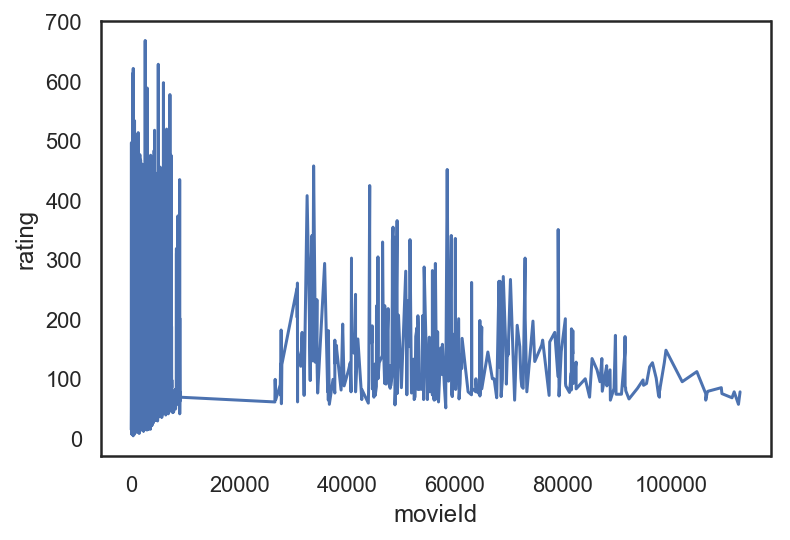

In [133]:
sns.lineplot(x="movieId", y="rating", data=_df)

In [136]:
df = pd.merge(movie_df, ratings_df, left_on='movieId', right_on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12882,4.0,1147195252
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,121987,4.5,1308152264
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18127,4.0,1130946329
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17318,4.0,1168807334
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,69519,4.0,1303980621


In [174]:
# Add Genres count i.e number of genres movie belongs to
df['genres_count'] = df.apply(lambda x:len(x.genres.split('|')), axis=1)

### Raw  mean recommender

In [175]:
# Simple Mean
df.groupby(by=['title'])\
.mean()\
.sort_values('rating', ascending=False)\
.apply(lambda x:np.round(x, decimals=3), axis=1)\
.loc[:, 'rating']\
.reset_index()\
.head(10)

,title,rating
0,"Shawshank Redemption, The (1994)",4.364
1,"Godfather, The (1972)",4.316
2,Touch of Evil (1958),4.259
3,Fight Club (1999),4.259
4,Band of Brothers (2001),4.247
5,12 Angry Men (1957),4.246
6,Stop Making Sense (1984),4.220
7,"Godfather: Part II, The (1974)",4.218
8,Pulp Fiction (1994),4.218
9,"Matrix, The (1999)",4.195


### Damped mean recommender

In [173]:
# Damped Mean
damping_factor = 5
global_mean = df.rating.mean()


# numerator -> summation of all ratings for movie + damping_factor * global_mean
# denominator -> number of ratings per movie + damping_factor

(((df.groupby(by=['title'])\
.agg({'rating': np.sum})) + 5 * global_mean) / \
(df.groupby(by=['title']).agg({'rating': len}) + 5)) \
.sort_values('rating', ascending=False)\
.apply(lambda x: np.round(x, decimals=3), axis=1)\
.reset_index()\
.head(10)

,title,rating
0,"Shawshank Redemption, The (1994)",4.357
1,"Godfather, The (1972)",4.307
2,Fight Club (1999),4.252
3,12 Angry Men (1957),4.227
4,Pulp Fiction (1994),4.212
5,Band of Brothers (2001),4.211
6,"Godfather: Part II, The (1974)",4.208
7,Touch of Evil (1958),4.195
8,"Matrix, The (1999)",4.190
9,Memento (2000),4.188


### Basic association rule recommender

In [303]:
parent_movie_id = 260

In [304]:
# numerator -> people who watched parent movie and other movie
get_users = lambda x : df.query('movieId == @x')['userId'].unique()
users_who_watched_parent_movie = get_users(parent_movie_id)
numerator = df.query("userId in @users_who_watched_parent_movie")\
.query('movieId != @parent_movie_id')\
.groupby(by=['title'])\
.nunique()['userId']\
.reset_index()\
.rename(columns={'title': 'movie', 'userId': 'userId'})

# denominator -> people who watch parent movie
denominator = df.query('movieId == @parent_movie_id')\
.nunique()\
.reset_index()\
.rename(columns={'index': 'field', 0: 'count'})\
.query('field == "userId"')['count'].values[0]

In [241]:
numerator['association_score'] = numerator.apply(lambda x:x.userId/denominator, axis=1)
numerator\
.sort_values('association_score', ascending=False)\
.head(10)

,movie,userId,association_score
1433,"Matrix, The (1999)",490,0.915888
2138,Star Wars: Episode V - The Empire Strikes Back...,481,0.899065
1360,"Lord of the Rings: The Fellowship of the Ring,...",477,0.891589
2139,Star Wars: Episode VI - Return of the Jedi (1983),453,0.846729
832,Forrest Gump (1994),451,0.842991
1362,"Lord of the Rings: The Two Towers, The (2002)",450,0.841121
1361,"Lord of the Rings: The Return of the King, The...",444,0.829907
1794,Pulp Fiction (1994),443,0.828037
1814,Raiders of the Lost Ark (Indiana Jones and the...,423,0.790654
1210,Jurassic Park (1993),422,0.788785


### Lift association rule recommender

In [329]:
parent_movie_id = 2761

total_number_of_users = df.nunique()['userId']

other_movies = df.query('movieId != @parent_movie_id')['movieId'].unique()

users_who_watched_parent_movie = get_users(parent_movie_id)
num_of_people_who_watched_parent_movie_and_other_movie_x = lambda x : df.query("userId in @users_who_watched_parent_movie", inplace=False)\
.query('movieId == @x', inplace=False)\
.nunique()['userId']

num_of_people_who_watched_movie_x = lambda x: df.query('movieId == @x', inplace=False).nunique()['userId']

In [291]:
# numerator -> people who watched parent movie and other movie
# denominator -> people who watched parent movie * people who watched other movie

In [332]:
lift_df = pd.DataFrame(columns=['movieId', 'lift'])
for movieId in other_movies:
    lift = (num_of_people_who_watched_parent_movie_and_other_movie_x(movieId) * total_number_of_users) / \
    (num_of_people_who_watched_movie_x(parent_movie_id) * num_of_people_who_watched_movie_x(movieId))
    lift_df = lift_df.append({'movieId': movieId, 'lift': lift}, ignore_index=True)

In [333]:
lift_df.sort_values('lift', ascending=False)\
.apply(lambda x: np.round(x, ))
.head(10)

,movieId,lift
352,631.0,4.897727
1197,2532.0,4.810268
1572,3615.0,4.545703
496,1016.0,4.489583
1163,2439.0,4.489583
202,340.0,4.489583
817,1649.0,4.489583
196,332.0,4.377344
1277,2736.0,4.329241
1450,3213.0,4.316907
